### Part -1: Understanding Matrix operations


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
# Prices for gold & S^P500
tickers = ['^GSPC', 'GC=F']

In [25]:
df= yf.download(tickers, start='2015-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [26]:
# We will be working with log returns
# take the row wise price and divide it by previous day price and then take the log value
ret_df = np.log(df/df.shift(1))

In [27]:
# Correlation of teh assets
ret_df.corr()

Ticker,GC=F,^GSPC
Ticker,,
GC=F,1.000000,0.045916
^GSPC,0.045916,1.000000


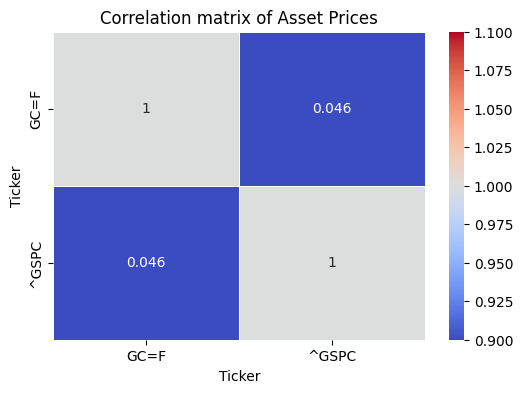

In [6]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = ret_df['Close'].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=1, vmax=1, linewidth=0.5)
plt.title("Correlation matrix of Asset Prices")
plt.show()

As we can observe the correlation of 1 exists for both assets. However we can also notice there is positive correlation between S&P index and gold.

In [28]:
# Fixing the NaN and inf values
print(ret_df.isna().sum())
print(np.isinf(ret_df).sum())

# Filling the missing values
ret_df_clean = ret_df.fillna(0)

Ticker
GC=F     7
^GSPC    3
dtype: int64
Ticker
GC=F     0
^GSPC    0
dtype: int64


In [37]:
ret_df.mean()

Ticker
GC=F     0.000405
^GSPC    0.000381
dtype: float64

In [29]:
# cumulartive returns
ret_cum_sum = ret_df_clean.cumsum()

<Axes: xlabel='Date'>

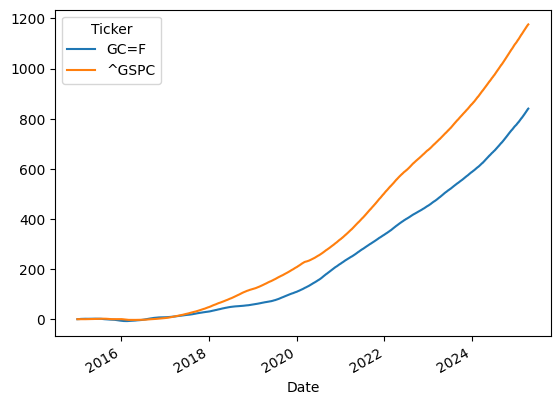

In [31]:
# Plotting the returns from S&P 500 and Gold
ret_cum_sum.cumsum().plot()

As we can observe S&P clearly outperformed Gold before 2018.

In [32]:
# Mean returns
print(f"Mean returns", ret_cum_sum.mean())
print(f"Risk factor" ,ret_df_clean.std())

Mean returns Ticker
GC=F     0.324759
^GSPC    0.454631
dtype: float64
Risk factor Ticker
GC=F     0.009262
^GSPC    0.011500
dtype: float64


In [33]:
# Making weights flexible
W = np.ones(len(ret_df_clean.columns))/ (np.ones(len(ret_df_clean.columns))).sum()

In [34]:

# Weights
np.array([0.5, 0.5])

array([0.5, 0.5])

In [35]:
# average returns
(W * ret_df_clean.mean()).sum()

0.0003922886964001887

Notice: Our standard average returns are different than the log returns. We should also consider this is beacuse of in average return we did not take standard deviation into the account, which is a risk factor.

In [38]:
ret_df_clean.cov()

Ticker,GC=F,^GSPC
Ticker,,
GC=F,0.000086,0.000005
^GSPC,0.000005,0.000132


In [42]:
# Portfolio Variance
W[0]**2 * 0.000086 + W[1]**2 * 0.000132 + 2*W[0]*W[1]*0.000005

5.7e-05

In [43]:
# Portfolio risk
4.55e-05 ** (1/2)

0.006745368781616021

In [46]:
(W.dot(ret_df_clean.cov().dot(W)))**(1/2)

0.00754667097621593

Alright, so we have the portfolio risk at 0.00754667097621593. And our standard mean return from the portfolio is Gold = 0.000405 and S&P:0.000381.

In [47]:
# Sharpe ratio, risk to reward ratio
ret_df_clean.mean()/ret_df_clean.std()

Ticker
GC=F     0.043602
^GSPC    0.033108
dtype: float64

In [48]:
# Simlarly we can find Sharpe ratio for portfolio
ret_df_clean.mean().dot(W)/ (W.dot(ret_df_clean.cov().dot(W)))**(1/2)

0.05198168803655609